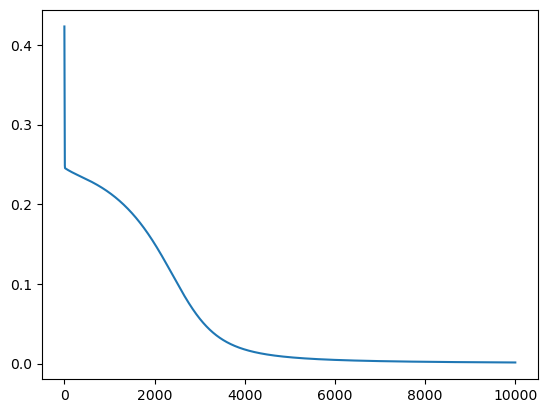

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])


class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2 #layer 1
        hiddenLayer1Neurons = 10 #layer 2
        hiddenLayer2Neurons = 20  #layer 3
        outLayerNeurons = 1

        self.learning_rate = 0.2

      
        self.W_HI1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)

  
        self.W_IH2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)

        self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_HI1)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_IH2)
        self.hidden2_output = self.sigmoid(hidden2_input)

        output_input = np.dot(self.hidden2_output, self.W_OH2)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden2_error = output_delta.dot(self.W_OH2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_IH2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_HI1 += X.T.dot(hidden1_delta)
        self.W_IH2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH2 += self.hidden2_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [2]:
print(NN.feedForward([0,0]))

[0.03379011]


In [3]:
print(NN.feedForward([1,1]))

[0.04233592]


In [4]:
print(NN.feedForward([1,0]))

[0.9583005]


In [5]:
print(NN.feedForward([0,1]))

[0.96510021]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Generate a Synthetic Dataset
# Generate synthetic dataset with 5 classes
X, y = make_classification(n_samples=1000, n_features=10, n_classes=5, n_informative=8, n_clusters_per_class=1, random_state=42)

# One-hot encode the labels for multi-class classification
Y = np.eye(5)[y]  # Convert class labels to one-hot encoded vectors

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [10]:
# Neural Network Class with Three Hidden Layers
class NeuralNetwork:
    def __init__(self, input_size=10, hidden1_size=64, hidden2_size=32, hidden3_size=16, output_size=5):
        # Initialize weights for 3 hidden layers and 1 output layer
        self.W1 = np.random.randn(input_size, hidden1_size)
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size)
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, hidden3_size)
        self.b3 = np.zeros((1, hidden3_size))
        self.W4 = np.random.randn(hidden3_size, output_size)
        self.b4 = np.zeros((1, output_size))

    # ReLU activation function for hidden layers
    def relu(self, x):
        return np.maximum(0, x)

    # Softmax activation function for the output layer
    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max for numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    # Feedforward process: passes input through all layers
    def feedForward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        return self.softmax(self.z4)  # Output layer

    # Cross-entropy loss function for multi-class classification
    def cross_entropy_loss(self, Y_pred, Y_true):
        n_samples = Y_true.shape[0]
        logp = - np.log(Y_pred[range(n_samples), np.argmax(Y_true, axis=1)])
        return np.sum(logp) / n_samples

    # Backpropagation to compute gradients and update weights
    def backpropagation(self, X, Y, learning_rate=0.01):
        m = X.shape[0]  # Number of samples

        # Forward pass
        Y_pred = self.feedForward(X)

        # Compute gradients for the output layer
        dz4 = Y_pred - Y
        dW4 = np.dot(self.a3.T, dz4) / m
        db4 = np.sum(dz4, axis=0, keepdims=True) / m

        # Backpropagate to the third hidden layer
        dz3 = np.dot(dz4, self.W4.T) * (self.a3 > 0)
        dW3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        # Backpropagate to the second hidden layer
        dz2 = np.dot(dz3, self.W3.T) * (self.a2 > 0)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Backpropagate to the first hidden layer
        dz1 = np.dot(dz2, self.W2.T) * (self.a1 > 0)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights and biases using gradient descent
        self.W4 -= learning_rate * dW4
        self.b4 -= learning_rate * db4
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

        # Return the loss value
        return self.cross_entropy_loss(Y_pred, Y)


C:\Users\h\AppData\Local\Temp\ipykernel_18940\2471272.py:37: RuntimeWarning: divide by zero encountered in log
  logp = - np.log(Y_pred[range(n_samples), np.argmax(Y_true, axis=1)])


Epoch 0, Loss: inf
Epoch 500, Loss: 0.59790053696158


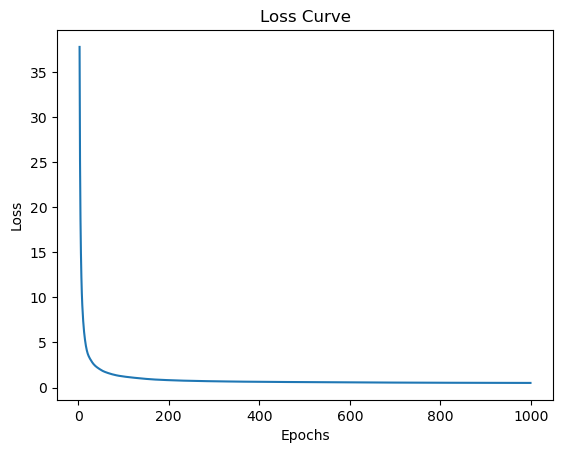

In [12]:
# Training the Neural Network
# Initialize the neural network
NN = NeuralNetwork()

epochs = 1000  # Number of iterations over the dataset
learning_rate = 0.01
losses = []

# Training loop
for epoch in range(epochs):
    loss = NN.backpropagation(X_train, Y_train, learning_rate)
    losses.append(loss)

    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Plot the loss curve
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [13]:
# Evaluate the Neural Network
# Predict on training and testing data
Y_pred_train = NN.feedForward(X_train)
Y_pred_test = NN.feedForward(X_test)

# Convert predictions from one-hot encoding to class labels
Y_pred_train_labels = np.argmax(Y_pred_train, axis=1)
Y_pred_test_labels = np.argmax(Y_pred_test, axis=1)

# Convert true labels from one-hot encoding to class labels
Y_train_labels = np.argmax(Y_train, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)

# Calculate accuracy for training and testing data
train_accuracy = accuracy_score(Y_train_labels, Y_pred_train_labels)
test_accuracy = accuracy_score(Y_test_labels, Y_pred_test_labels)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Generate confusion matrix and classification report for test data
conf_matrix = confusion_matrix(Y_test_labels, Y_pred_test_labels)
class_report = classification_report(Y_test_labels, Y_pred_test_labels, target_names=[f'Class {i}' for i in range(5)])

# Display results
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Training Accuracy: 77.25%
Testing Accuracy: 64.00%
Confusion Matrix:
[[32  1  0  0  9]
 [12 15  1  3  2]
 [ 3  1 27  5  4]
 [15  1  2 23  0]
 [ 7  1  2  3 31]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.46      0.76      0.58        42
     Class 1       0.79      0.45      0.58        33
     Class 2       0.84      0.68      0.75        40
     Class 3       0.68      0.56      0.61        41
     Class 4       0.67      0.70      0.69        44

    accuracy                           0.64       200
   macro avg       0.69      0.63      0.64       200
weighted avg       0.68      0.64      0.64       200

